In [1]:
import pandas as pd
import os
from tqdm import tqdm

## Load dataset

In [2]:
import re

# remove special characters
special_chars_re = r'[^\w\s]'

In [3]:
re.sub(special_chars_re, '', "2022年8月22日贷款市场报价利率（LPR）,中国人民银行授权全国银行间同业拆借中心公布年月日贷款市场报价利率（）为")

'2022年8月22日贷款市场报价利率LPR中国人民银行授权全国银行间同业拆借中心公布年月日贷款市场报价利率为'

In [30]:
folder_path = "tmp/raw_text/ce_cn"
dataframes = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
ce_cn = pd.concat(dataframes, ignore_index=True).drop('scrape_date', axis=1).drop_duplicates()

ce_cn['article_time'] = pd.to_datetime(ce_cn['article_time'], format='%Y年%m月%d日 %H:%M')
ce_cn.to_csv('ce_cn_raw.csv', index=False)
ce_cn['content'] = ce_cn['content'].apply(func= lambda x: re.sub(special_chars_re, '', str(x)))
ce_cn = ce_cn.sort_values(by='article_time').reset_index(drop=True)

In [31]:
ce_cn

,identifier,title,content,article_time,article_source
0,t20220615_37756408,正视疫情防控的复杂性和长期性,鉴于北京天堂超市酒吧引发聚集性疫情北京市有关部门依法对其立案调查这起聚集性疫情仍处于发展阶段...,2022-06-15 05:06:00,来源：中国经济网-《经济日报》
1,t20220615_37756422,北京对全市娱乐场所开展大检查,经济日报北京6月14日讯记者韩秉志14日举行的北京疫情防控工作新闻发布会通报为以最快速度阻断...,2022-06-15 05:08:00,来源：中国经济网-《经济日报》
2,t20220615_37756427,我国自主培养研究生成科创主力 10年间输送60多万名博士650多万名硕士,经济日报北京6月14日讯记者 李丹教育部14日召开教育这十年新闻发布会介绍研究生教育十年改革...,2022-06-15 05:11:00,来源：中国经济网-《经济日报》
3,t20220615_37756443,首批科创票落地 银行间债市创新支持“硬科技”,首批科创票据近期在银行间债市落地记者通过公开信息查询了解到其中无锡华光环保能源集团股份有限公...,2022-06-15 05:17:00,来源：中国经济网-《经济日报》
4,t20220615_37756445,一系列稳投资政策举措密集出台 各地重大项目建设热潮再起,新基建成经济复苏压舱石走进江苏省无锡市蠡园经济开发区的国家超级计算无锡中心神威太湖之光超级计...,2022-06-15 05:18:00,来源：中国经济网-《经济日报》
...,...,...,...,...,...
2116,t20230320_38451396,压实耕地保护责任,今年全国两会期间习近平总书记再次强调要严守耕地红线稳定粮食播种面积加强高标准农田建设切实保障...,2023-03-20 08:58:00,来源：中国经济网-《经济日报》
2117,t20230320_38451400,鼓励闲置交易助力碳减排,今年政府工作报告提出完善支持绿色发展的政策和金融工具发展循环经济推进资源节约集约利用作为循环...,2023-03-20 08:59:00,来源：中国经济网-《经济日报》
2118,t20230320_38451478,房地产业应顺应趋势加快转型,近期多地新房二手房市场呈现回暖迹象国家统计局数据显示2023年2月份70个大中城市中商品住宅...,2023-03-20 09:05:00,来源：中国经济网-《经济日报》
2119,t20230320_38451536,国台办：大陆方面欢迎马英九先生来访,马英九将于3月27日率团来大陆祭祖交流国台办发言人马晓光20日上午表示大陆方面欢迎马英九先生...,2023-03-20 09:16:00,来源：人民日报


In [7]:
folder_path = "tmp/raw_text/mrxwlb"
dataframes = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path, encoding='utf-8')
            dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
mrxwlb = pd.concat(dataframes, ignore_index=True)

xwlb_tmp = mrxwlb[~mrxwlb['content'].str.contains('Perhaps try sear')]
xwlb_tmp['date'] = pd.to_datetime(xwlb_tmp['date'])
xwlb_tmp = xwlb_tmp.sort_values(by='date').drop_duplicates().reset_index( drop=True)
xwlb_tmp.to_csv('xwlb_raw.csv', index=False)
xwlb_tmp['content'] = xwlb_tmp['content'].apply(func= lambda x: re.sub(special_chars_re, '', str(x)))

/tmp/ipykernel_18231/3973032843.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xwlb_tmp['date'] = pd.to_datetime(xwlb_tmp['date'])


## Word count model

In [8]:
import jieba
import jieba.analyse as jba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
text_data = "".join(xwlb_tmp['content'].to_list())

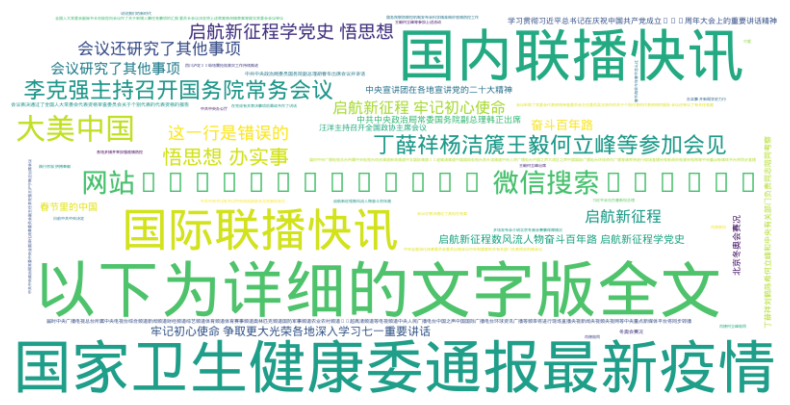

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='DroidSansFallback.ttf').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
from collections import Counter


# remove stopwords
def get_stopword_list(file):
    with open(file, 'r', encoding='utf-8') as f:    # 
        stopword_list = [word.strip('\n') for word in f.readlines()]
    return stopword_list

def clean_stopword(str, stopword_path):
    stopword_list = get_stopword_list(stopword_path)
    result = ''
    word_list = jieba.lcut(str)   # 分词后返回一个列表  jieba.cut(）   返回的是一个迭代器
    for w in word_list:
        if w not in stopword_list:
            result += w
    return result


clean_text = clean_stopword(text_data.replace(" ", ''), 'baidu_stopwords.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.459 seconds.
Prefix dict has been built successfully.


In [12]:
Counter(jieba.lcut(clean_text)).most_common()

[('日', 10477),
 ('发展', 9237),
 ('月', 9116),
 ('中国', 8261),
 ('新', 7082),
 ('习近平', 6991),
 ('国家', 6076),
 ('年', 4892),
 ('病例', 4549),
 ('工作', 4108),
 ('美国', 4056),
 ('建设', 3846),
 ('例', 3604),
 ('上', 3234),
 ('疫情', 3209),
 ('中', 3186),
 ('党', 3114),
 ('我国', 3097),
 ('总书记', 3065),
 ('确诊', 2923),
 ('国际', 2915),
 ('人民', 2884),
 ('全国', 2867),
 ('推动', 2864),
 ('合作', 2836),
 ('时代', 2746),
 ('经济', 2609),
 ('推进', 2607),
 ('新冠', 2578),
 ('主席', 2297),
 ('北京', 2285),
 ('全球', 2241),
 ('大', 2217),
 ('报告', 2208),
 ('7', 2156),
 ('时', 2134),
 ('累计', 2134),
 ('8', 2123),
 ('6', 2100),
 ('增长', 2055),
 ('地区', 2048),
 ('中国共产党', 1960),
 ('新增', 1956),
 ('指出', 1955),
 ('世界', 1919),
 ('企业', 1910),
 ('持续', 1885),
 ('社会主义', 1859),
 ('1', 1836),
 ('会议', 1806),
 ('5', 1793),
 ('超过', 1779),
 ('已', 1763),
 ('支持', 1701),
 ('10', 1695),
 ('健康', 1685),
 ('截至', 1683),
 ('总统', 1652),
 ('创新', 1641),
 ('中央', 1633),
 ('乌克兰', 1631),
 ('3', 1604),
 ('服务', 1581),
 ('4', 1572),
 ('代表', 1535),
 ('下', 1519),
 ('生态', 1517),
 ('好'

In [13]:
jba.extract_tags(xwlb_tmp['content'].to_list()[3])

['生态',
 '建设',
 '文明',
 '习近平',
 '病例',
 '海南',
 '新冠',
 '耗材',
 '中国',
 '美国',
 '病毒',
 '美丽',
 '今天',
 '推进',
 '白俄罗斯',
 '采购',
 '带量',
 '10',
 '自贸港',
 '全球']

In [14]:
import multiprocessing
import jieba
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# from nltk.corpus import stopwords
# import nltk
from tools import *
# nltk.download('stopwords')


# load the news data
chinese_documents = ce_cn['content'].to_list()

In [15]:
# 使用ThreadPoolExecutor并行处理文本
with multiprocessing.Pool() as pool:
    processed_chinese_documents = pool.map(preprocess_chinese_text, chinese_documents)

In [20]:
# 使用TF-IDF向量化中文文本数据
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(chinese_documents)

# 使用K均值聚类进行文本分类（这里将文档分为3个类别）
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(tfidf_matrix)

/home/kenjigy/miniconda3/envs/th_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

In [21]:
labeled_document = []
# 输出每个文档所属的类别
for i, label in enumerate(kmeans.labels_):
    # print(f"Document {chinese_documents[i]} belongs to Cluster {label}")
    labeled_document.append((chinese_documents[i], label))

In [22]:
tmp_df = pd.DataFrame(labeled_document, columns=['content', 'label'])

In [27]:
tmp_df.groupby('label').count()

,content
label,
0,11
1,8
2,83
3,97
4,1779
5,143


In [29]:
tmp_df[tmp_df.label == 4]

,content,label
0,鉴于北京天堂超市酒吧引发聚集性疫情北京市有关部门依法对其立案调查这起聚集性疫情仍处于发展阶段...,4
1,经济日报北京6月14日讯记者韩秉志14日举行的北京疫情防控工作新闻发布会通报为以最快速度阻断...,4
2,经济日报北京6月14日讯记者 李丹教育部14日召开教育这十年新闻发布会介绍研究生教育十年改革...,4
3,首批科创票据近期在银行间债市落地记者通过公开信息查询了解到其中无锡华光环保能源集团股份有限公...,4
4,新基建成经济复苏压舱石走进江苏省无锡市蠡园经济开发区的国家超级计算无锡中心神威太湖之光超级计...,4
...,...,...
2108,央视网消息中央气象台3月20日06时继续发布沙尘暴蓝色预警受冷空气大风影响预计3月20日08...,4
2109,作为种植牙费用综合治理的重要组成部分牙冠的竞价挂网将于今天20日上午10点在四川成都举行并产...,4
2111,前段时间有媒体报道称大量集装箱空箱堆积在港口进而引发对中国外贸状况的担忧那么真实的情况究竟如...,4
2119,马英九将于3月27日率团来大陆祭祖交流国台办发言人马晓光20日上午表示大陆方面欢迎马英九先生...,4
